In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load our raw data

immo_H = pd.read_csv('../data/interim/immo_houses.csv')
immo_H

,Price,Postal Code,Facades,Habitable Surface,Land Surface,Type,Subtype,Bedroom Count,Bathroom Count,Toilet Count,...,Furnished,Terrace,Terrace Surface,Garden Exists,State of Building,Living Surface,EPC,Consumption Per m2,Heating Type,Province
0,378500.0,9800,2.0,123.0,175.0,HOUSE,HOUSE,3.0,1.0,2.0,...,0,1,NaN,0,AS_NEW,30.0,NaN,NaN,NaN,OOST-VLAANDEREN
1,381000.0,9800,2.0,123.0,191.0,HOUSE,HOUSE,3.0,1.0,2.0,...,0,1,NaN,0,AS_NEW,33.0,NaN,NaN,NaN,OOST-VLAANDEREN
2,399500.0,9800,3.0,123.0,168.0,HOUSE,VILLA,3.0,1.0,2.0,...,0,1,NaN,0,AS_NEW,31.0,NaN,NaN,GAS,OOST-VLAANDEREN
3,410400.0,9800,3.0,123.0,234.0,HOUSE,VILLA,3.0,1.0,2.0,...,0,1,NaN,0,AS_NEW,31.0,NaN,NaN,NaN,OOST-VLAANDEREN
4,411900.0,9800,3.0,123.0,252.0,HOUSE,VILLA,3.0,1.0,2.0,...,0,1,NaN,0,AS_NEW,31.0,NaN,NaN,NaN,OOST-VLAANDEREN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,229000.0,8800,2.0,149.0,289.0,HOUSE,HOUSE,4.0,1.0,1.0,...,0,1,NaN,0,GOOD,22.0,F,635.0,NaN,WEST-VLAANDEREN
8058,220000.0,2200,3.0,100.0,344.0,HOUSE,HOUSE,3.0,1.0,NaN,...,0,0,NaN,0,NaN,32.0,F,836.0,GAS,ANTWERPEN
8059,399000.0,9040,4.0,168.0,153.0,HOUSE,HOUSE,3.0,2.0,2.0,...,0,0,NaN,0,GOOD,NaN,D,376.0,GAS,OOST-VLAANDEREN
8060,90000.0,4100,2.0,92.0,221.0,HOUSE,HOUSE,2.0,1.0,NaN,...,0,0,NaN,1,NaN,13.0,F,434.0,FUELOIL,LUIK


In [3]:
immo_H.describe(include='all')

,Price,Postal Code,Facades,Habitable Surface,Land Surface,Type,Subtype,Bedroom Count,Bathroom Count,Toilet Count,...,Furnished,Terrace,Terrace Surface,Garden Exists,State of Building,Living Surface,EPC,Consumption Per m2,Heating Type,Province
count,8.062000e+03,8062.000000,7052.000000,7512.000000,8062.000000,8062,8061,8062.000000,7285.000000,6095.000000,...,8062.000000,8062.000000,2547.000000,8062.000000,5976,3800.000000,6832,6584.000000,5684,8062
unique,NaN,NaN,NaN,NaN,NaN,1,15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6,NaN,10,NaN,7,11
top,NaN,NaN,NaN,NaN,NaN,HOUSE,HOUSE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,GOOD,NaN,C,NaN,GAS,OOST-VLAANDEREN
freq,NaN,NaN,NaN,NaN,NaN,8062,6086,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2681,NaN,1288,NaN,3743,1450
mean,4.863332e+05,5232.175391,2.977737,213.202210,899.481270,NaN,NaN,3.559911,1.505148,2.105989,...,0.011784,0.563508,32.809580,0.392334,NaN,35.432368,NaN,448.358469,NaN,NaN
std,5.111472e+05,3033.029459,0.841039,154.691599,2591.496014,NaN,NaN,1.737613,1.031695,1.123015,...,0.107918,0.495981,78.248066,0.488301,NaN,27.511191,NaN,2670.327466,NaN,NaN
min,1.000000e+04,1000.000000,1.000000,25.000000,0.000000,NaN,NaN,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,NaN,1.000000,NaN,-15.000000,NaN,NaN
25%,2.780000e+05,2390.000000,2.000000,143.000000,161.000000,NaN,NaN,3.000000,1.000000,1.000000,...,0.000000,0.000000,15.000000,0.000000,NaN,25.000000,NaN,201.000000,NaN,NaN
50%,3.790000e+05,4540.000000,3.000000,180.000000,362.000000,NaN,NaN,3.000000,1.000000,2.000000,...,0.000000,1.000000,23.000000,0.000000,NaN,33.000000,NaN,312.000000,NaN,NaN
75%,5.300000e+05,8510.000000,4.000000,240.000000,803.750000,NaN,NaN,4.000000,2.000000,2.000000,...,0.000000,1.000000,38.000000,1.000000,NaN,40.000000,NaN,455.250000,NaN,NaN


In [4]:
immo_H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8062 entries, 0 to 8061
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               8062 non-null   float64
 1   Postal Code         8062 non-null   int64  
 2   Facades             7052 non-null   float64
 3   Habitable Surface   7512 non-null   float64
 4   Land Surface        8062 non-null   float64
 5   Type                8062 non-null   object 
 6   Subtype             8061 non-null   object 
 7   Bedroom Count       8062 non-null   float64
 8   Bathroom Count      7285 non-null   float64
 9   Toilet Count        6095 non-null   float64
 10  Room Count          7954 non-null   float64
 11  Kitchen Type        5404 non-null   object 
 12  Furnished           8062 non-null   int64  
 13  Terrace             8062 non-null   int64  
 14  Terrace Surface     2547 non-null   float64
 15  Garden Exists       8062 non-null   int64  
 16  State 

In [5]:
immo_H.shape

(8062, 22)

In [6]:
# Checking for duplicates

immo_H.duplicated().sum()

0

### Encoding Categorical features

In [7]:
# Categorical features
del immo_H['Type']
immo_H.select_dtypes(include=['object']).columns

Index(['Subtype', 'Kitchen Type', 'State of Building', 'EPC', 'Heating Type',
       'Province'],
      dtype='object')

In [8]:
def encode_decode(df: pd.DataFrame, column: str, encoder: dict) -> pd.DataFrame:
    df[column] = df[column].map(encoder)
    return df

### Kitchen Type

In [9]:
kitchen_type_encoder = {
    'USA_HYPER_EQUIPPED': 3,
    'HYPER_EQUIPPED': 3,
    'USA_SEMI_EQUIPPED': 2,
    'SEMI_EQUIPPED': 2,
    'USA_INSTALLED': 1,
    'INSTALLED': 1,
    'USA_UNINSTALLED': 0,
    'NOT_INSTALLED': 0
    }

immo_H = encode_decode(df=immo_H, column='Kitchen Type', encoder=kitchen_type_encoder)
immo_H

,Price,Postal Code,Facades,Habitable Surface,Land Surface,Subtype,Bedroom Count,Bathroom Count,Toilet Count,Room Count,...,Furnished,Terrace,Terrace Surface,Garden Exists,State of Building,Living Surface,EPC,Consumption Per m2,Heating Type,Province
0,378500.0,9800,2.0,123.0,175.0,HOUSE,3.0,1.0,2.0,6.0,...,0,1,NaN,0,AS_NEW,30.0,NaN,NaN,NaN,OOST-VLAANDEREN
1,381000.0,9800,2.0,123.0,191.0,HOUSE,3.0,1.0,2.0,6.0,...,0,1,NaN,0,AS_NEW,33.0,NaN,NaN,NaN,OOST-VLAANDEREN
2,399500.0,9800,3.0,123.0,168.0,VILLA,3.0,1.0,2.0,6.0,...,0,1,NaN,0,AS_NEW,31.0,NaN,NaN,GAS,OOST-VLAANDEREN
3,410400.0,9800,3.0,123.0,234.0,VILLA,3.0,1.0,2.0,6.0,...,0,1,NaN,0,AS_NEW,31.0,NaN,NaN,NaN,OOST-VLAANDEREN
4,411900.0,9800,3.0,123.0,252.0,VILLA,3.0,1.0,2.0,6.0,...,0,1,NaN,0,AS_NEW,31.0,NaN,NaN,NaN,OOST-VLAANDEREN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,229000.0,8800,2.0,149.0,289.0,HOUSE,4.0,1.0,1.0,6.0,...,0,1,NaN,0,GOOD,22.0,F,635.0,NaN,WEST-VLAANDEREN
8058,220000.0,2200,3.0,100.0,344.0,HOUSE,3.0,1.0,NaN,4.0,...,0,0,NaN,0,NaN,32.0,F,836.0,GAS,ANTWERPEN
8059,399000.0,9040,4.0,168.0,153.0,HOUSE,3.0,2.0,2.0,7.0,...,0,0,NaN,0,GOOD,NaN,D,376.0,GAS,OOST-VLAANDEREN
8060,90000.0,4100,2.0,92.0,221.0,HOUSE,2.0,1.0,NaN,3.0,...,0,0,NaN,1,NaN,13.0,F,434.0,FUELOIL,LUIK


### State of Building

In [10]:
# Encoding Estate of Building

state_of_building_encoder = {
    'TO_RESTORE': 1, 
    'TO_RENOVATE': 2, 
    'TO_BE_DONE_UP': 3, 
    'GOOD': 4, 
    'JUST_RENOVATED': 5, 
    'AS_NEW': 6
}

immo_H = encode_decode(df=immo_H, column='State of Building', encoder=state_of_building_encoder)
immo_H

,Price,Postal Code,Facades,Habitable Surface,Land Surface,Subtype,Bedroom Count,Bathroom Count,Toilet Count,Room Count,...,Furnished,Terrace,Terrace Surface,Garden Exists,State of Building,Living Surface,EPC,Consumption Per m2,Heating Type,Province
0,378500.0,9800,2.0,123.0,175.0,HOUSE,3.0,1.0,2.0,6.0,...,0,1,NaN,0,6.0,30.0,NaN,NaN,NaN,OOST-VLAANDEREN
1,381000.0,9800,2.0,123.0,191.0,HOUSE,3.0,1.0,2.0,6.0,...,0,1,NaN,0,6.0,33.0,NaN,NaN,NaN,OOST-VLAANDEREN
2,399500.0,9800,3.0,123.0,168.0,VILLA,3.0,1.0,2.0,6.0,...,0,1,NaN,0,6.0,31.0,NaN,NaN,GAS,OOST-VLAANDEREN
3,410400.0,9800,3.0,123.0,234.0,VILLA,3.0,1.0,2.0,6.0,...,0,1,NaN,0,6.0,31.0,NaN,NaN,NaN,OOST-VLAANDEREN
4,411900.0,9800,3.0,123.0,252.0,VILLA,3.0,1.0,2.0,6.0,...,0,1,NaN,0,6.0,31.0,NaN,NaN,NaN,OOST-VLAANDEREN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,229000.0,8800,2.0,149.0,289.0,HOUSE,4.0,1.0,1.0,6.0,...,0,1,NaN,0,4.0,22.0,F,635.0,NaN,WEST-VLAANDEREN
8058,220000.0,2200,3.0,100.0,344.0,HOUSE,3.0,1.0,NaN,4.0,...,0,0,NaN,0,NaN,32.0,F,836.0,GAS,ANTWERPEN
8059,399000.0,9040,4.0,168.0,153.0,HOUSE,3.0,2.0,2.0,7.0,...,0,0,NaN,0,4.0,NaN,D,376.0,GAS,OOST-VLAANDEREN
8060,90000.0,4100,2.0,92.0,221.0,HOUSE,2.0,1.0,NaN,3.0,...,0,0,NaN,1,NaN,13.0,F,434.0,FUELOIL,LUIK


### EPC

In [11]:
# Encoding EPC

epc_encoder = {
    'A++': 9,
    'A+': 8,
    'A': 7,
    'B': 6,
    'C': 5,
    'D': 4,
    'E': 3,
    'F': 2,
    'G': 1,
    }

immo_H = encode_decode(df=immo_H, column='EPC', encoder=epc_encoder)
immo_H

,Price,Postal Code,Facades,Habitable Surface,Land Surface,Subtype,Bedroom Count,Bathroom Count,Toilet Count,Room Count,...,Furnished,Terrace,Terrace Surface,Garden Exists,State of Building,Living Surface,EPC,Consumption Per m2,Heating Type,Province
0,378500.0,9800,2.0,123.0,175.0,HOUSE,3.0,1.0,2.0,6.0,...,0,1,NaN,0,6.0,30.0,NaN,NaN,NaN,OOST-VLAANDEREN
1,381000.0,9800,2.0,123.0,191.0,HOUSE,3.0,1.0,2.0,6.0,...,0,1,NaN,0,6.0,33.0,NaN,NaN,NaN,OOST-VLAANDEREN
2,399500.0,9800,3.0,123.0,168.0,VILLA,3.0,1.0,2.0,6.0,...,0,1,NaN,0,6.0,31.0,NaN,NaN,GAS,OOST-VLAANDEREN
3,410400.0,9800,3.0,123.0,234.0,VILLA,3.0,1.0,2.0,6.0,...,0,1,NaN,0,6.0,31.0,NaN,NaN,NaN,OOST-VLAANDEREN
4,411900.0,9800,3.0,123.0,252.0,VILLA,3.0,1.0,2.0,6.0,...,0,1,NaN,0,6.0,31.0,NaN,NaN,NaN,OOST-VLAANDEREN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,229000.0,8800,2.0,149.0,289.0,HOUSE,4.0,1.0,1.0,6.0,...,0,1,NaN,0,4.0,22.0,2.0,635.0,NaN,WEST-VLAANDEREN
8058,220000.0,2200,3.0,100.0,344.0,HOUSE,3.0,1.0,NaN,4.0,...,0,0,NaN,0,NaN,32.0,2.0,836.0,GAS,ANTWERPEN
8059,399000.0,9040,4.0,168.0,153.0,HOUSE,3.0,2.0,2.0,7.0,...,0,0,NaN,0,4.0,NaN,4.0,376.0,GAS,OOST-VLAANDEREN
8060,90000.0,4100,2.0,92.0,221.0,HOUSE,2.0,1.0,NaN,3.0,...,0,0,NaN,1,NaN,13.0,2.0,434.0,FUELOIL,LUIK


In [12]:
immo_H.duplicated().sum()

1

In [13]:
immo_H.shape

(8062, 21)

In [14]:
immo_H.drop_duplicates(inplace=True)
immo_H.shape

(8061, 21)

In [15]:
immo_H

,Price,Postal Code,Facades,Habitable Surface,Land Surface,Subtype,Bedroom Count,Bathroom Count,Toilet Count,Room Count,...,Furnished,Terrace,Terrace Surface,Garden Exists,State of Building,Living Surface,EPC,Consumption Per m2,Heating Type,Province
0,378500.0,9800,2.0,123.0,175.0,HOUSE,3.0,1.0,2.0,6.0,...,0,1,NaN,0,6.0,30.0,NaN,NaN,NaN,OOST-VLAANDEREN
1,381000.0,9800,2.0,123.0,191.0,HOUSE,3.0,1.0,2.0,6.0,...,0,1,NaN,0,6.0,33.0,NaN,NaN,NaN,OOST-VLAANDEREN
2,399500.0,9800,3.0,123.0,168.0,VILLA,3.0,1.0,2.0,6.0,...,0,1,NaN,0,6.0,31.0,NaN,NaN,GAS,OOST-VLAANDEREN
3,410400.0,9800,3.0,123.0,234.0,VILLA,3.0,1.0,2.0,6.0,...,0,1,NaN,0,6.0,31.0,NaN,NaN,NaN,OOST-VLAANDEREN
4,411900.0,9800,3.0,123.0,252.0,VILLA,3.0,1.0,2.0,6.0,...,0,1,NaN,0,6.0,31.0,NaN,NaN,NaN,OOST-VLAANDEREN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,229000.0,8800,2.0,149.0,289.0,HOUSE,4.0,1.0,1.0,6.0,...,0,1,NaN,0,4.0,22.0,2.0,635.0,NaN,WEST-VLAANDEREN
8058,220000.0,2200,3.0,100.0,344.0,HOUSE,3.0,1.0,NaN,4.0,...,0,0,NaN,0,NaN,32.0,2.0,836.0,GAS,ANTWERPEN
8059,399000.0,9040,4.0,168.0,153.0,HOUSE,3.0,2.0,2.0,7.0,...,0,0,NaN,0,4.0,NaN,4.0,376.0,GAS,OOST-VLAANDEREN
8060,90000.0,4100,2.0,92.0,221.0,HOUSE,2.0,1.0,NaN,3.0,...,0,0,NaN,1,NaN,13.0,2.0,434.0,FUELOIL,LUIK


In [16]:
immo_H.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8061 entries, 0 to 8061
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               8061 non-null   float64
 1   Postal Code         8061 non-null   int64  
 2   Facades             7051 non-null   float64
 3   Habitable Surface   7511 non-null   float64
 4   Land Surface        8061 non-null   float64
 5   Subtype             8060 non-null   object 
 6   Bedroom Count       8061 non-null   float64
 7   Bathroom Count      7284 non-null   float64
 8   Toilet Count        6095 non-null   float64
 9   Room Count          7953 non-null   float64
 10  Kitchen Type        5403 non-null   float64
 11  Furnished           8061 non-null   int64  
 12  Terrace             8061 non-null   int64  
 13  Terrace Surface     2547 non-null   float64
 14  Garden Exists       8061 non-null   int64  
 15  State of Building   5975 non-null   float64
 16  Living Surf

In [17]:
from typing import List

def display_correlation_matrix(df: pd.DataFrame, columns: List = None, method: str = 'pearson'):

    if columns:
        correlation_matrix = df[columns].corr(method=method)
    else:
        correlation_matrix = df[df.select_dtypes(include=['int', 'float']).columns].corr(method=method)

    plt.figure(figsize=(20, 15))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

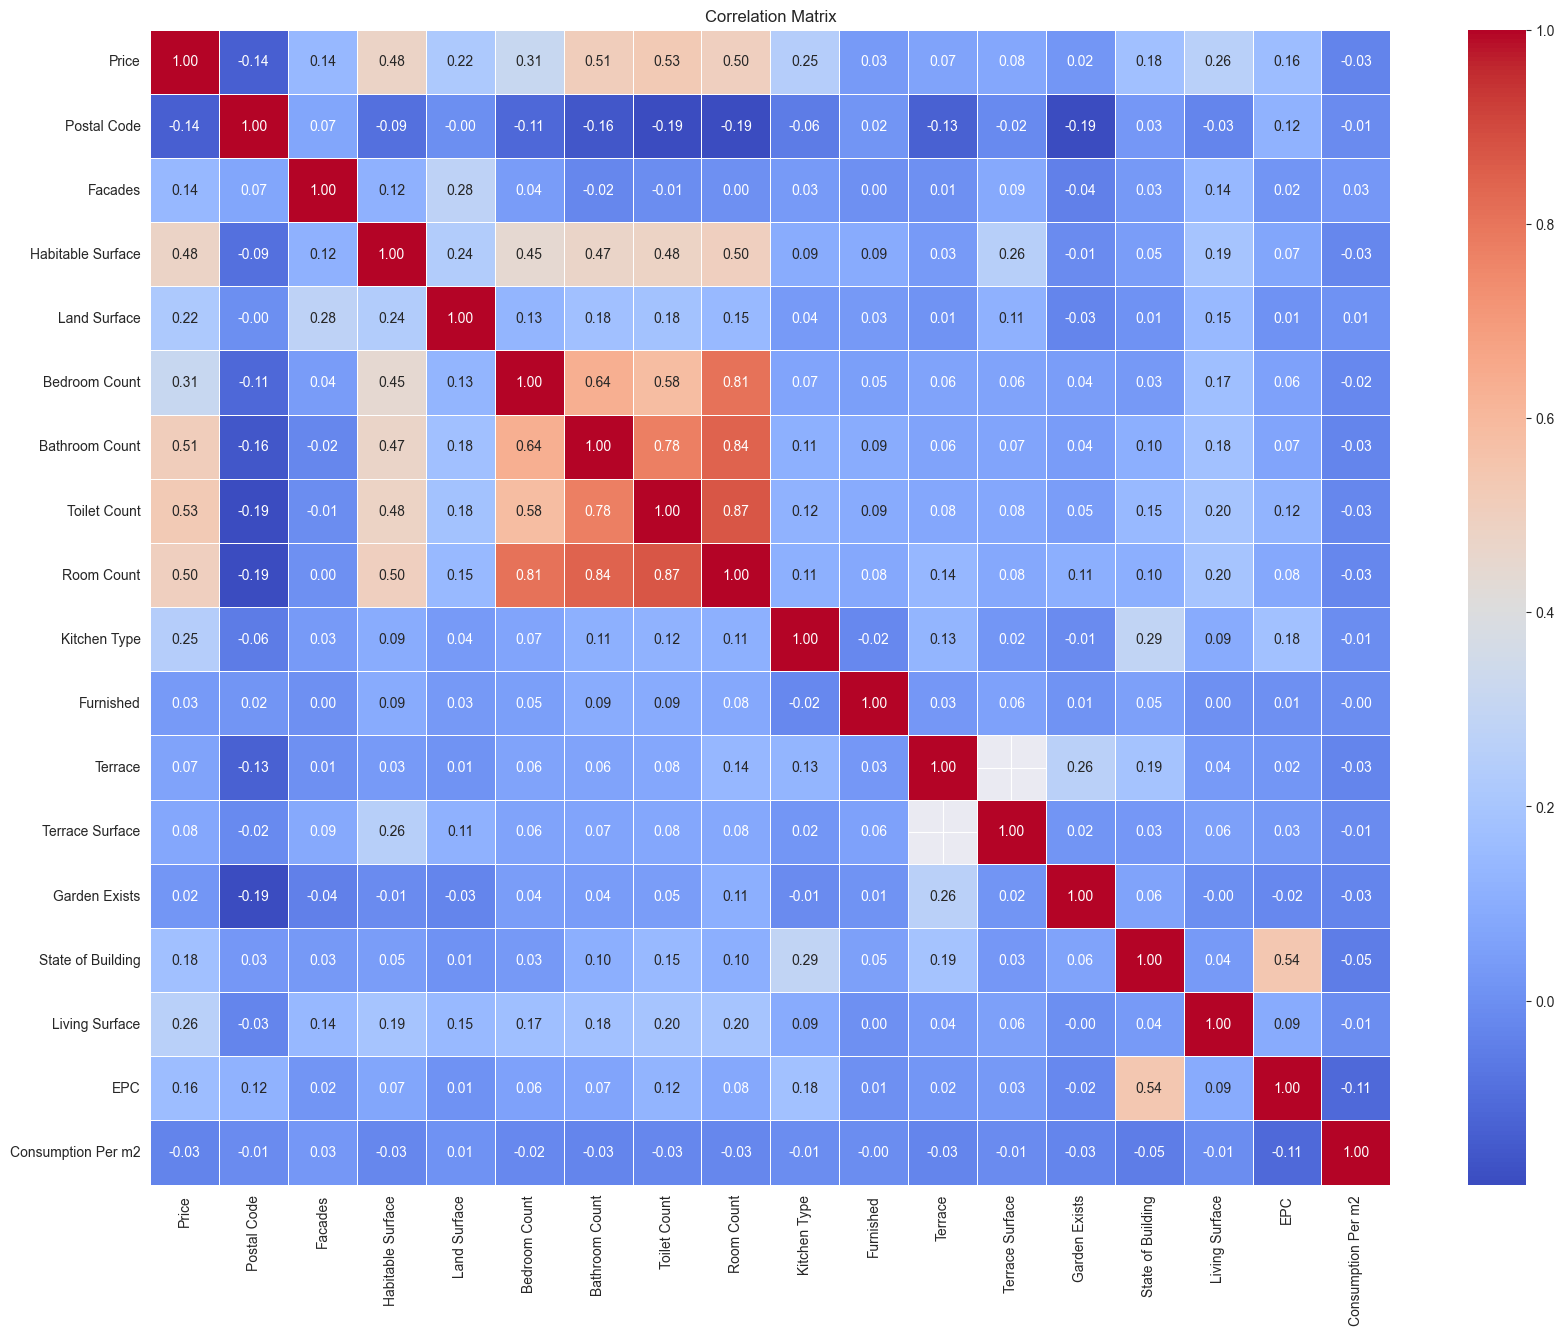

In [18]:
display_correlation_matrix(df=immo_H)


In [19]:
del immo_H['Terrace Surface']

In [20]:
del immo_H['Subtype']

In [21]:
del immo_H['Heating Type']

### Dealing with outliers

In [22]:
# # Calculating the interquartile range (IQR)
# Q1 = immo_H['Price'].quantile(0.25)
# Q3 = immo_H['Price'].quantile(0.75)
# IQR = Q3 - Q1
# 
# # the limits to detect outliers
# lower_limit = Q1 - 1.5 * IQR
# upper_limit = Q3 + 1.5 * IQR
# 
# # Identify outliers
# outliers = immo_H[(immo_H['Price'] < lower_limit) | (immo_H['Price'] > upper_limit )]
# 
# # Calculates the number of values inside the IQR and the number of outliers.
# values_inside_IQR = immo_H[(immo_H['Price'] >= lower_limit) & (immo_H['Price'] <= upper_limit)].shape[0]
# quantity_outliers = outliers.shape[0]
# 
# print(f"Price Count: {immo_H['Price'].count()}")
# print(f"Price mean: {immo_H['Price'].mean()}")
# print(f"Outliers Price mean: {outliers['Price'].mean()}")
# 
# outliers.shape



def remove_outliers_by_province(df: pd.DataFrame):
    df_clean = pd.DataFrame()  
    for province, group in df.groupby('Province'):
        Q1 = group['Price'].quantile(0.25)  
        Q3 = group['Price'].quantile(0.75)  
        IQR = Q3 - Q1  
        lower_bound = Q1 - 1.5 * IQR 
        upper_bound = Q3 + 1.5 * IQR  
        outliers_removed = group[(group['Price'] >= lower_bound) & (group['Price'] <= upper_bound)]
        df_clean = pd.concat([df_clean, outliers_removed]) 
    return df_clean

In [23]:
# quantity_outliers

In [24]:
immo_H.shape

(8061, 18)

In [25]:
immo_H = remove_outliers_by_province(immo_H)

In [26]:
immo_H.shape

(7513, 18)

In [27]:
immo_H.columns

Index(['Price', 'Postal Code', 'Facades', 'Habitable Surface', 'Land Surface',
       'Bedroom Count', 'Bathroom Count', 'Toilet Count', 'Room Count',
       'Kitchen Type', 'Furnished', 'Terrace', 'Garden Exists',
       'State of Building', 'Living Surface', 'EPC', 'Consumption Per m2',
       'Province'],
      dtype='object')

In [28]:
immo_H.duplicated().sum()

122

In [29]:
immo_H.drop_duplicates(inplace=True)

In [30]:
immo_H.duplicated().sum()

0

In [31]:
house_y = immo_H['Price']
house_y

22      269000.0
23       99000.0
26      584000.0
27      299000.0
43      380600.0
          ...   
8049    485000.0
8051    315000.0
8056    290000.0
8057    229000.0
8061    349000.0
Name: Price, Length: 7391, dtype: float64

### Province One-Hot-Encoded

In [32]:
def province_one_hot_encoded(df: pd.DataFrame) -> pd.DataFrame:
    # Perform one-hot encoding for the 'Type' column
    one_hot_encoded = pd.get_dummies(df['Province'])
    
    # Convert True/False to 1/0
    one_hot_encoded = one_hot_encoded.astype(int)
    
    # Concatenate the original DataFrame with the one-hot-encoded columns
    df_encoded = pd.concat([df, one_hot_encoded], axis=1)
    
    # Delete the original 'Type' column
    # immo_AP_H_encoded.drop(columns=['Type'], inplace=True)
    return df_encoded

In [33]:
immo_H = province_one_hot_encoded(immo_H)
immo_H

,Price,Postal Code,Facades,Habitable Surface,Land Surface,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Type,...,BRUSSEL,HENEGOUWEN,LIMBURG,LUIK,LUXEMBURG,NAMEN,OOST-VLAANDEREN,VLAAMS-BRABANT,WAALS-BRABANT,WEST-VLAANDEREN
22,269000.0,2300,2.0,178.0,172.0,4.0,1.0,NaN,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
23,99000.0,2275,4.0,33.0,2684.0,1.0,1.0,1.0,3.0,NaN,...,0,0,0,0,0,0,0,0,0,0
26,584000.0,2880,3.0,284.0,1535.0,4.0,1.0,2.0,7.0,NaN,...,0,0,0,0,0,0,0,0,0,0
27,299000.0,2223,3.0,NaN,1604.0,3.0,NaN,1.0,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0
43,380600.0,2430,3.0,209.0,0.0,3.0,1.0,2.0,6.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8049,485000.0,8500,3.0,NaN,420.0,3.0,3.0,NaN,6.0,2.0,...,0,0,0,0,0,0,0,0,0,1
8051,315000.0,8301,2.0,NaN,141.0,2.0,1.0,1.0,4.0,NaN,...,0,0,0,0,0,0,0,0,0,1
8056,290000.0,8400,NaN,NaN,551.0,3.0,1.0,1.0,5.0,NaN,...,0,0,0,0,0,0,0,0,0,1
8057,229000.0,8800,2.0,149.0,289.0,4.0,1.0,1.0,6.0,NaN,...,0,0,0,0,0,0,0,0,0,1


In [34]:
immo_H.duplicated().sum()

0

In [35]:
immo_H.shape

(7391, 29)

In [36]:
immo_H.to_csv('../data/interim/nullvalues_houses.csv', index=False)

In [36]:
# Splitting data in Train and Test

from sklearn.model_selection import train_test_split

train_house_set, test_house_set, y_train, y_test = train_test_split(immo_H, house_y, test_size=0.2, random_state=42)

In [37]:
train_house_set.head()

,Price,Postal Code,Facades,Habitable Surface,Land Surface,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Type,...,BRUSSEL,HENEGOUWEN,LIMBURG,LUIK,LUXEMBURG,NAMEN,OOST-VLAANDEREN,VLAAMS-BRABANT,WAALS-BRABANT,WEST-VLAANDEREN
6589,185000.0,6041,2.0,120.0,280.0,2.0,1.0,1.0,4.0,2.0,...,0,1,0,0,0,0,0,0,0,0
5428,395000.0,4100,3.0,184.0,1200.0,4.0,1.0,1.0,6.0,1.0,...,0,0,0,1,0,0,0,0,0,0
1129,329000.0,1800,2.0,115.0,187.0,3.0,1.0,1.0,5.0,3.0,...,0,0,0,0,0,0,0,1,0,0
5330,299500.0,9870,4.0,192.0,864.0,3.0,1.0,NaN,4.0,2.0,...,0,0,0,0,0,0,1,0,0,0
476,439750.0,9030,2.0,172.0,149.0,5.0,2.0,2.0,9.0,NaN,...,0,0,0,0,0,0,1,0,0,0


In [38]:
train_house_set.shape

(5912, 29)

In [39]:
test_house_set.shape

(1479, 29)

### Dealing with missing values

In [40]:
train_house_set.isnull().mean()

Price                 0.000000
Postal Code           0.000000
Facades               0.128214
Habitable Surface     0.064953
Land Surface          0.000000
Bedroom Count         0.000000
Bathroom Count        0.093708
Toilet Count          0.239175
Room Count            0.009303
Kitchen Type          0.331867
Furnished             0.000000
Terrace               0.000000
Garden Exists         0.000000
State of Building     0.266915
Living Surface        0.512686
EPC                   0.153248
Consumption Per m2    0.183018
Province              0.000000
ANTWERPEN             0.000000
BRUSSEL               0.000000
HENEGOUWEN            0.000000
LIMBURG               0.000000
LUIK                  0.000000
LUXEMBURG             0.000000
NAMEN                 0.000000
OOST-VLAANDEREN       0.000000
VLAAMS-BRABANT        0.000000
WAALS-BRABANT         0.000000
WEST-VLAANDEREN       0.000000
dtype: float64

In [41]:
test_house_set.isnull().mean()

Price                 0.000000
Postal Code           0.000000
Facades               0.121704
Habitable Surface     0.080460
Land Surface          0.000000
Bedroom Count         0.000000
Bathroom Count        0.104801
Toilet Count          0.242732
Room Count            0.017579
Kitchen Type          0.344151
Furnished             0.000000
Terrace               0.000000
Garden Exists         0.000000
State of Building     0.269101
Living Surface        0.544287
EPC                   0.164300
Consumption Per m2    0.196755
Province              0.000000
ANTWERPEN             0.000000
BRUSSEL               0.000000
HENEGOUWEN            0.000000
LIMBURG               0.000000
LUIK                  0.000000
LUXEMBURG             0.000000
NAMEN                 0.000000
OOST-VLAANDEREN       0.000000
VLAAMS-BRABANT        0.000000
WAALS-BRABANT         0.000000
WEST-VLAANDEREN       0.000000
dtype: float64

In [42]:
### Group properties by municipality and property type, and within each group allow a price difference of up to 50000 euros between properties.
### Calculate the average of the selected features by groups and apply each average to the null values of each group.

In [43]:
train_house_set.isnull().sum()

Price                    0
Postal Code              0
Facades                758
Habitable Surface      384
Land Surface             0
Bedroom Count            0
Bathroom Count         554
Toilet Count          1414
Room Count              55
Kitchen Type          1962
Furnished                0
Terrace                  0
Garden Exists            0
State of Building     1578
Living Surface        3031
EPC                    906
Consumption Per m2    1082
Province                 0
ANTWERPEN                0
BRUSSEL                  0
HENEGOUWEN               0
LIMBURG                  0
LUIK                     0
LUXEMBURG                0
NAMEN                    0
OOST-VLAANDEREN          0
VLAAMS-BRABANT           0
WAALS-BRABANT            0
WEST-VLAANDEREN          0
dtype: int64

In [44]:
def impute_null_values_with_province_feature_averages(df: pd.DataFrame) -> pd.DataFrame:
    # Define the columns for which you want to calculate the average
    columns_for_means = ['Habitable Surface', 'Living Surface', 'Consumption Per m2']
    # Define the columns for which you want to calculate the median
    columns_for_median = ['Facades', 'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Type', 'State of Building', 'EPC']
    
    
    price_ranges = list(range(0, int(df['Price'].max()) + 1, 100000))
    
    df_imputed = df.copy(deep=True)
    
    
    df_imputed['Price_range'] = pd.cut(df_imputed['Price'], bins=price_ranges, right=False)
    
    
    groups = df_imputed.groupby(['Province', 'Price_range'], observed=False)
    
    # Calculate the mean of each group for the specified columns
    means_per_group = groups[columns_for_means].mean()
    # Calculate the median of each group for the specified columns
    medians_per_group = groups[columns_for_median].median()
    
    for group, mean in means_per_group.iterrows():
        mean_mask = (df_imputed['Province'] == group[0]) & (df_imputed['Price_range'] == group[1])
        df_imputed.loc[mean_mask, columns_for_means] = df_imputed.loc[mean_mask, columns_for_means].fillna(mean)
        
        
    for group, median in medians_per_group.iterrows():
        median_mask = (df_imputed['Province'] == group[0]) & (df_imputed['Price_range'] == group[1])
        df_imputed.loc[median_mask, columns_for_median] = df_imputed.loc[median_mask, columns_for_median].fillna(median)

    
    return df_imputed
    
    

In [45]:
train_house_set_imputed = impute_null_values_with_province_feature_averages(train_house_set)

In [46]:
train_house_set.isnull().sum()

Price                    0
Postal Code              0
Facades                758
Habitable Surface      384
Land Surface             0
Bedroom Count            0
Bathroom Count         554
Toilet Count          1414
Room Count              55
Kitchen Type          1962
Furnished                0
Terrace                  0
Garden Exists            0
State of Building     1578
Living Surface        3031
EPC                    906
Consumption Per m2    1082
Province                 0
ANTWERPEN                0
BRUSSEL                  0
HENEGOUWEN               0
LIMBURG                  0
LUIK                     0
LUXEMBURG                0
NAMEN                    0
OOST-VLAANDEREN          0
VLAAMS-BRABANT           0
WAALS-BRABANT            0
WEST-VLAANDEREN          0
dtype: int64

In [47]:
train_house_set_imputed.isnull().sum()

Price                  0
Postal Code            0
Facades                2
Habitable Surface      2
Land Surface           0
Bedroom Count          0
Bathroom Count         0
Toilet Count           2
Room Count             0
Kitchen Type           3
Furnished              0
Terrace                0
Garden Exists          0
State of Building      5
Living Surface        12
EPC                    0
Consumption Per m2     0
Province               0
ANTWERPEN              0
BRUSSEL                0
HENEGOUWEN             0
LIMBURG                0
LUIK                   0
LUXEMBURG              0
NAMEN                  0
OOST-VLAANDEREN        0
VLAAMS-BRABANT         0
WAALS-BRABANT          0
WEST-VLAANDEREN        0
Price_range            5
dtype: int64

In [48]:
train_house_set_imputed = train_house_set_imputed.dropna()

In [49]:
train_house_set_imputed.shape

(5893, 30)

In [50]:
train_house_set.shape

(5912, 29)

In [51]:
train_house_set_imputed

,Price,Postal Code,Facades,Habitable Surface,Land Surface,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Type,...,HENEGOUWEN,LIMBURG,LUIK,LUXEMBURG,NAMEN,OOST-VLAANDEREN,VLAAMS-BRABANT,WAALS-BRABANT,WEST-VLAANDEREN,Price_range
6589,185000.0,6041,2.0,120.0,280.0,2.0,1.0,1.0,4.0,2.0,...,1,0,0,0,0,0,0,0,0,"[100000, 200000)"
5428,395000.0,4100,3.0,184.0,1200.0,4.0,1.0,1.0,6.0,1.0,...,0,0,1,0,0,0,0,0,0,"[300000, 400000)"
1129,329000.0,1800,2.0,115.0,187.0,3.0,1.0,1.0,5.0,3.0,...,0,0,0,0,0,0,1,0,0,"[300000, 400000)"
5330,299500.0,9870,4.0,192.0,864.0,3.0,1.0,1.0,4.0,2.0,...,0,0,0,0,0,1,0,0,0,"[200000, 300000)"
476,439750.0,9030,2.0,172.0,149.0,5.0,2.0,2.0,9.0,1.0,...,0,0,0,0,0,1,0,0,0,"[400000, 500000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6942,395000.0,9200,2.0,215.0,259.0,4.0,1.0,2.0,5.0,1.0,...,0,0,0,0,0,1,0,0,0,"[300000, 400000)"
7095,160000.0,9200,2.0,155.0,287.0,3.0,1.0,1.0,4.0,1.0,...,0,0,0,0,0,1,0,0,0,"[100000, 200000)"
225,495000.0,3191,4.0,220.0,494.0,4.0,1.0,2.0,5.0,1.0,...,0,0,0,0,0,0,1,0,0,"[400000, 500000)"
5864,373000.0,2660,2.0,190.0,130.0,4.0,2.0,2.0,8.0,1.0,...,0,0,0,0,0,0,0,0,0,"[300000, 400000)"


In [52]:
train_house_set_imputed.duplicated().sum()

0

In [53]:
# train_house_set_imputed.drop_duplicates(inplace=True)

In [54]:
# train_house_set_imputed.duplicated().sum()

In [55]:
train_house_set_imputed.reset_index(drop=True, inplace=True)

In [56]:
train_house_set_imputed

,Price,Postal Code,Facades,Habitable Surface,Land Surface,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Type,...,HENEGOUWEN,LIMBURG,LUIK,LUXEMBURG,NAMEN,OOST-VLAANDEREN,VLAAMS-BRABANT,WAALS-BRABANT,WEST-VLAANDEREN,Price_range
0,185000.0,6041,2.0,120.0,280.0,2.0,1.0,1.0,4.0,2.0,...,1,0,0,0,0,0,0,0,0,"[100000, 200000)"
1,395000.0,4100,3.0,184.0,1200.0,4.0,1.0,1.0,6.0,1.0,...,0,0,1,0,0,0,0,0,0,"[300000, 400000)"
2,329000.0,1800,2.0,115.0,187.0,3.0,1.0,1.0,5.0,3.0,...,0,0,0,0,0,0,1,0,0,"[300000, 400000)"
3,299500.0,9870,4.0,192.0,864.0,3.0,1.0,1.0,4.0,2.0,...,0,0,0,0,0,1,0,0,0,"[200000, 300000)"
4,439750.0,9030,2.0,172.0,149.0,5.0,2.0,2.0,9.0,1.0,...,0,0,0,0,0,1,0,0,0,"[400000, 500000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,395000.0,9200,2.0,215.0,259.0,4.0,1.0,2.0,5.0,1.0,...,0,0,0,0,0,1,0,0,0,"[300000, 400000)"
5889,160000.0,9200,2.0,155.0,287.0,3.0,1.0,1.0,4.0,1.0,...,0,0,0,0,0,1,0,0,0,"[100000, 200000)"
5890,495000.0,3191,4.0,220.0,494.0,4.0,1.0,2.0,5.0,1.0,...,0,0,0,0,0,0,1,0,0,"[400000, 500000)"
5891,373000.0,2660,2.0,190.0,130.0,4.0,2.0,2.0,8.0,1.0,...,0,0,0,0,0,0,0,0,0,"[300000, 400000)"


In [57]:
house_features_columns = ['Facades', 'Habitable Surface', 'Land Surface', 'Bedroom Count', 'Bathroom Count', 'Toilet Count', 'Room Count','Kitchen Type', 'Furnished', 
                 'Terrace', 'Garden Exists','State of Building', 'Living Surface', 'EPC', 'Consumption Per m2','ANTWERPEN', 'BRUSSEL', 'HENEGOUWEN', 'LIMBURG', 
                 'LUIK', 'LUXEMBURG', 'NAMEN', 'OOST-VLAANDEREN', 'VLAAMS-BRABANT', 'WAALS-BRABANT', 'WEST-VLAANDEREN']

In [58]:
train_house_set_imputed.duplicated().sum()

0

In [59]:
X_train_house = train_house_set_imputed[house_features_columns]
X_train_house

,Facades,Habitable Surface,Land Surface,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Type,Furnished,Terrace,...,BRUSSEL,HENEGOUWEN,LIMBURG,LUIK,LUXEMBURG,NAMEN,OOST-VLAANDEREN,VLAAMS-BRABANT,WAALS-BRABANT,WEST-VLAANDEREN
0,2.0,120.0,280.0,2.0,1.0,1.0,4.0,2.0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,3.0,184.0,1200.0,4.0,1.0,1.0,6.0,1.0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,2.0,115.0,187.0,3.0,1.0,1.0,5.0,3.0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,4.0,192.0,864.0,3.0,1.0,1.0,4.0,2.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,172.0,149.0,5.0,2.0,2.0,9.0,1.0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,2.0,215.0,259.0,4.0,1.0,2.0,5.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
5889,2.0,155.0,287.0,3.0,1.0,1.0,4.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
5890,4.0,220.0,494.0,4.0,1.0,2.0,5.0,1.0,0,1,...,0,0,0,0,0,0,0,1,0,0
5891,2.0,190.0,130.0,4.0,2.0,2.0,8.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X_train_house.duplicated().sum()

119

In [61]:
y_train_house = train_house_set_imputed['Price']
y_train_house

0       185000.0
1       395000.0
2       329000.0
3       299500.0
4       439750.0
          ...   
5888    395000.0
5889    160000.0
5890    495000.0
5891    373000.0
5892    299000.0
Name: Price, Length: 5893, dtype: float64

In [62]:
X_train_house = X_train_house.drop_duplicates()
y_train_house = y_train_house.loc[X_train_house.index]

In [63]:
X_train_house.duplicated().sum()

0

In [64]:
X_train_house.shape

(5774, 26)

In [65]:
y_train_house.shape

(5774,)

In [66]:
test_house_set.shape

(1479, 29)

In [67]:
test_house_set_imputed = impute_null_values_with_province_feature_averages(test_house_set)

In [68]:
test_house_set_imputed.shape

(1479, 30)

In [69]:
test_house_set.isnull().sum()

Price                   0
Postal Code             0
Facades               180
Habitable Surface     119
Land Surface            0
Bedroom Count           0
Bathroom Count        155
Toilet Count          359
Room Count             26
Kitchen Type          509
Furnished               0
Terrace                 0
Garden Exists           0
State of Building     398
Living Surface        805
EPC                   243
Consumption Per m2    291
Province                0
ANTWERPEN               0
BRUSSEL                 0
HENEGOUWEN              0
LIMBURG                 0
LUIK                    0
LUXEMBURG               0
NAMEN                   0
OOST-VLAANDEREN         0
VLAAMS-BRABANT          0
WAALS-BRABANT           0
WEST-VLAANDEREN         0
dtype: int64

In [70]:
test_house_set_imputed.isnull().sum()

Price                  0
Postal Code            0
Facades                1
Habitable Surface      2
Land Surface           0
Bedroom Count          0
Bathroom Count         1
Toilet Count           2
Room Count             0
Kitchen Type           6
Furnished              0
Terrace                0
Garden Exists          0
State of Building      2
Living Surface        37
EPC                    2
Consumption Per m2     2
Province               0
ANTWERPEN              0
BRUSSEL                0
HENEGOUWEN             0
LIMBURG                0
LUIK                   0
LUXEMBURG              0
NAMEN                  0
OOST-VLAANDEREN        0
VLAAMS-BRABANT         0
WAALS-BRABANT          0
WEST-VLAANDEREN        0
Price_range            1
dtype: int64

In [71]:
test_house_set_imputed = test_house_set_imputed.dropna()

In [72]:
test_house_set_imputed.shape

(1437, 30)

In [73]:
test_house_set.shape

(1479, 29)

In [74]:
test_house_set_imputed

,Price,Postal Code,Facades,Habitable Surface,Land Surface,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Type,...,HENEGOUWEN,LIMBURG,LUIK,LUXEMBURG,NAMEN,OOST-VLAANDEREN,VLAAMS-BRABANT,WAALS-BRABANT,WEST-VLAANDEREN,Price_range
7044,233000.0,8531,2.0,207.0,610.0,3.0,1.0,1.0,5.0,1.0,...,0,0,0,0,0,0,0,0,1,"[200000, 300000)"
2849,382000.0,8434,3.0,147.0,391.0,3.0,1.0,1.0,5.0,1.0,...,0,0,0,0,0,0,0,0,1,"[300000, 400000)"
5406,1250000.0,1090,2.0,350.0,200.0,8.0,7.0,7.0,22.0,1.0,...,0,0,0,0,0,0,0,0,0,"[1200000, 1300000)"
226,315000.0,3440,4.0,200.0,4578.0,4.0,1.0,2.0,7.0,3.0,...,0,0,0,0,0,0,1,0,0,"[300000, 400000)"
6815,545000.0,9032,3.0,198.0,247.0,4.0,1.0,3.0,8.0,1.0,...,0,0,0,0,0,1,0,0,0,"[500000, 600000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148,468000.0,8340,3.0,249.0,515.0,5.0,1.0,2.0,6.0,1.0,...,0,0,0,0,0,0,0,0,1,"[400000, 500000)"
1464,435000.0,7850,2.0,186.0,329.0,3.0,2.0,2.0,7.0,1.0,...,1,0,0,0,0,0,0,0,0,"[400000, 500000)"
4680,415000.0,1540,4.0,156.0,0.0,3.0,1.0,1.0,5.0,2.0,...,0,0,0,0,0,0,1,0,0,"[400000, 500000)"
2040,360000.0,9500,3.0,232.0,537.0,3.0,1.0,2.0,6.0,0.0,...,0,0,0,0,0,1,0,0,0,"[300000, 400000)"


In [75]:
test_house_set_imputed.reset_index(drop=True, inplace=True)

In [76]:
test_house_set_imputed

,Price,Postal Code,Facades,Habitable Surface,Land Surface,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Type,...,HENEGOUWEN,LIMBURG,LUIK,LUXEMBURG,NAMEN,OOST-VLAANDEREN,VLAAMS-BRABANT,WAALS-BRABANT,WEST-VLAANDEREN,Price_range
0,233000.0,8531,2.0,207.0,610.0,3.0,1.0,1.0,5.0,1.0,...,0,0,0,0,0,0,0,0,1,"[200000, 300000)"
1,382000.0,8434,3.0,147.0,391.0,3.0,1.0,1.0,5.0,1.0,...,0,0,0,0,0,0,0,0,1,"[300000, 400000)"
2,1250000.0,1090,2.0,350.0,200.0,8.0,7.0,7.0,22.0,1.0,...,0,0,0,0,0,0,0,0,0,"[1200000, 1300000)"
3,315000.0,3440,4.0,200.0,4578.0,4.0,1.0,2.0,7.0,3.0,...,0,0,0,0,0,0,1,0,0,"[300000, 400000)"
4,545000.0,9032,3.0,198.0,247.0,4.0,1.0,3.0,8.0,1.0,...,0,0,0,0,0,1,0,0,0,"[500000, 600000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,468000.0,8340,3.0,249.0,515.0,5.0,1.0,2.0,6.0,1.0,...,0,0,0,0,0,0,0,0,1,"[400000, 500000)"
1433,435000.0,7850,2.0,186.0,329.0,3.0,2.0,2.0,7.0,1.0,...,1,0,0,0,0,0,0,0,0,"[400000, 500000)"
1434,415000.0,1540,4.0,156.0,0.0,3.0,1.0,1.0,5.0,2.0,...,0,0,0,0,0,0,1,0,0,"[400000, 500000)"
1435,360000.0,9500,3.0,232.0,537.0,3.0,1.0,2.0,6.0,0.0,...,0,0,0,0,0,1,0,0,0,"[300000, 400000)"


In [77]:
test_house_set_imputed.duplicated().sum()

1

In [78]:
test_house_set_imputed = test_house_set_imputed.drop_duplicates()

In [79]:
test_house_set_imputed.duplicated().sum()

0

In [80]:
X_test_house = test_house_set_imputed[house_features_columns]
X_test_house

,Facades,Habitable Surface,Land Surface,Bedroom Count,Bathroom Count,Toilet Count,Room Count,Kitchen Type,Furnished,Terrace,...,BRUSSEL,HENEGOUWEN,LIMBURG,LUIK,LUXEMBURG,NAMEN,OOST-VLAANDEREN,VLAAMS-BRABANT,WAALS-BRABANT,WEST-VLAANDEREN
0,2.0,207.0,610.0,3.0,1.0,1.0,5.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3.0,147.0,391.0,3.0,1.0,1.0,5.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,350.0,200.0,8.0,7.0,7.0,22.0,1.0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,4.0,200.0,4578.0,4.0,1.0,2.0,7.0,3.0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,3.0,198.0,247.0,4.0,1.0,3.0,8.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,3.0,249.0,515.0,5.0,1.0,2.0,6.0,1.0,0,1,...,0,0,0,0,0,0,0,0,0,1
1433,2.0,186.0,329.0,3.0,2.0,2.0,7.0,1.0,0,1,...,0,1,0,0,0,0,0,0,0,0
1434,4.0,156.0,0.0,3.0,1.0,1.0,5.0,2.0,0,1,...,0,0,0,0,0,0,0,1,0,0
1435,3.0,232.0,537.0,3.0,1.0,2.0,6.0,0.0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [81]:
y_test_house = test_house_set_imputed['Price']
y_test_house

0        233000.0
1        382000.0
2       1250000.0
3        315000.0
4        545000.0
          ...    
1432     468000.0
1433     435000.0
1434     415000.0
1435     360000.0
1436     215000.0
Name: Price, Length: 1436, dtype: float64

In [82]:
X_test_house.duplicated().sum()

10

In [83]:
X_test_house = X_test_house.drop_duplicates()

In [84]:
X_test_house.duplicated().sum()

0

In [85]:
y_test_house = y_test_house[X_test_house.index]

In [86]:
X_test_house.shape

(1426, 26)

In [87]:
y_test_house.shape

(1426,)

In [88]:
X_train_house.to_csv('../data/interim/X_train_house.csv', index=False)
y_train_house.to_csv('../data/interim/y_train_house.csv', index=False)
X_test_house.to_csv('../data/interim/X_test_house.csv', index=False)
y_test_house.to_csv('../data/interim/y_test_house.csv', index=False)

In [89]:
X_train_house.duplicated().sum()

0

In [90]:
test_house_set_imputed.duplicated().sum()

0

In [91]:
X_train_house.columns

Index(['Facades', 'Habitable Surface', 'Land Surface', 'Bedroom Count',
       'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Type',
       'Furnished', 'Terrace', 'Garden Exists', 'State of Building',
       'Living Surface', 'EPC', 'Consumption Per m2', 'ANTWERPEN', 'BRUSSEL',
       'HENEGOUWEN', 'LIMBURG', 'LUIK', 'LUXEMBURG', 'NAMEN',
       'OOST-VLAANDEREN', 'VLAAMS-BRABANT', 'WAALS-BRABANT',
       'WEST-VLAANDEREN'],
      dtype='object')

In [92]:
X_test_house.columns

Index(['Facades', 'Habitable Surface', 'Land Surface', 'Bedroom Count',
       'Bathroom Count', 'Toilet Count', 'Room Count', 'Kitchen Type',
       'Furnished', 'Terrace', 'Garden Exists', 'State of Building',
       'Living Surface', 'EPC', 'Consumption Per m2', 'ANTWERPEN', 'BRUSSEL',
       'HENEGOUWEN', 'LIMBURG', 'LUIK', 'LUXEMBURG', 'NAMEN',
       'OOST-VLAANDEREN', 'VLAAMS-BRABANT', 'WAALS-BRABANT',
       'WEST-VLAANDEREN'],
      dtype='object')